In [20]:
### PYCHARM ###

"""
import fastai
import torch
from fastai.vision.all import *
from fastai.callback.fp16 import *


from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch


path = "dataset_CIFAR10"


#check if cuda is available
torch.cuda.is_available()
"""


In [21]:
### COLAB ###

! [ -e /content ] && pip install -Uqq fastbook
import fastbook
from fastbook import *
fastbook.setup_book()
from fastai.callback.fp16 import *

!unzip /content/gdrive/MyDrive/dataset_CIFAR10.zip
path = "/content/"

True

In [22]:
#with maximum batch size

dls = ImageDataLoaders.from_folder(
    path=path,
    train='train',
    valid='validation',
    seed=42,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75),
    batch = 4096)



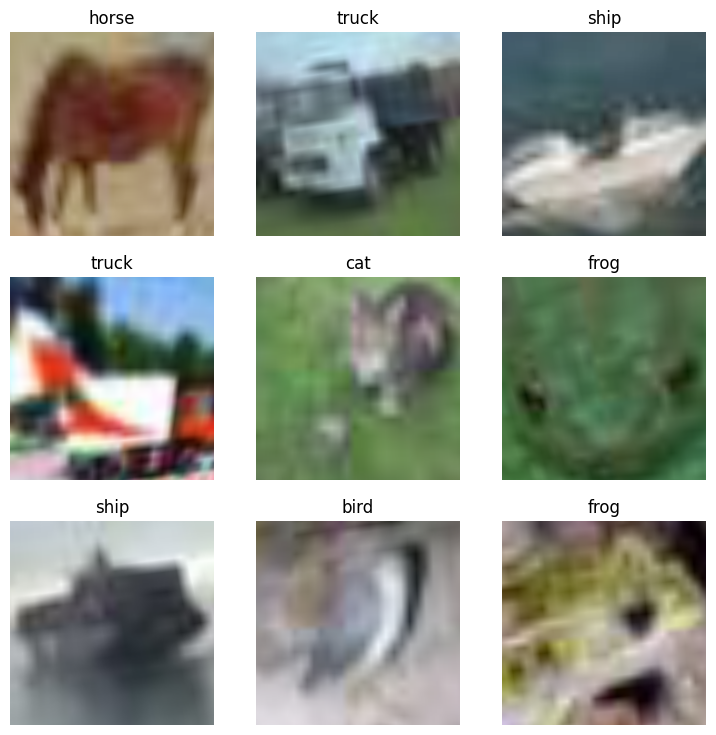

In [23]:
dls.show_batch()


In [24]:
learn = vision_learner(dls, resnet50, metrics=[accuracy, error_rate], ).to_fp16()
learn.fine_tune(1000, freeze_epochs=10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.322597,0.272559,0.908900,0.091100,04:10
1,0.265515,0.247932,0.916900,0.083100,04:11
2,0.218293,0.237042,0.923800,0.076200,04:19
3,0.191402,0.232227,0.924700,0.075300,04:10
4,0.154037,0.233823,0.924400,0.075600,04:09
5,0.131790,0.242212,0.924100,0.075900,04:10
6,0.118870,0.241949,0.926700,0.073300,04:20
7,0.104512,0.247876,0.928300,0.071700,04:10
8,0.087366,0.253277,0.928800,0.071200,04:11
9,0.078618,0.253376,0.926800,0.073200,04:20


KeyboardInterrupt: 

In [ ]:
#plot loss and accuracy
learn.recorder.plot_loss()